In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
df = pd.read_csv("latent_space_all_20210811-2045.csv")
df = df.sort_values("fraktion")
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,fraktion,original_index
0,-0.774191,1.104383,2.727813,-1.016565,0.084143,-0.273512,1.777052,-0.695911,2.730222,-0.806362,...,2.046167,-2.002246,1.511957,1.918362,-0.588854,0.471170,3.075633,2.894923,AfD,0
4914,-0.955289,0.538285,2.926551,-0.425187,-0.629891,-1.381302,1.896924,-0.520790,2.563857,-0.687968,...,1.529973,-1.943769,1.785488,2.317497,-0.476538,-0.902398,3.176129,3.199875,AfD,4914
15348,-0.502367,0.551713,2.707334,-0.491052,-0.262922,-0.911042,1.904515,-0.445207,2.512078,-1.200392,...,1.472870,-1.857526,1.541999,2.175834,-0.590928,-0.267934,3.150654,3.152682,AfD,15348
15356,-0.272253,0.245564,2.833244,0.042069,-0.068581,-0.227264,1.671697,-0.348427,2.586398,-0.591070,...,1.074817,-1.888735,1.985222,2.483503,-0.576972,0.302735,2.687355,2.825268,AfD,15356
4907,-1.007327,0.896261,2.533577,-0.944925,-0.100079,-0.378472,1.996271,-0.876260,3.057569,-0.024109,...,1.862682,-2.419808,1.735939,1.912601,-0.751985,0.470581,2.925675,2.647939,AfD,4907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,1.882931,-0.153170,-0.051384,0.063242,0.140270,3.562069,1.549337,1.947821,-0.004630,-1.094891,...,1.430807,-1.212727,-0.599099,-0.306462,2.918874,2.786514,2.937463,2.704127,fraktionslos,7712
12819,2.726799,-1.431076,-0.099819,0.174062,-0.437137,3.760553,0.422597,2.246523,-0.210308,-1.039622,...,0.643121,-0.934837,-1.275780,0.027126,3.028019,3.076901,2.773244,2.685478,fraktionslos,12819
2658,2.215991,-0.737946,-1.191363,-0.955399,-0.882273,3.730307,0.960226,2.413063,-1.115974,-1.535063,...,1.662304,-0.785435,-1.949182,-1.390639,3.945281,3.392157,2.112394,2.655731,fraktionslos,2658
5040,2.006105,0.414826,-0.316359,-0.036823,0.079645,3.838046,0.636660,1.940171,-1.436147,0.168803,...,1.656568,-0.795525,-0.879561,-0.502540,4.208628,2.842726,2.210109,2.567283,fraktionslos,5040


In [49]:
labels = df["fraktion"]

In [50]:
X = df.values[:, 0:-2].astype(np.float32)

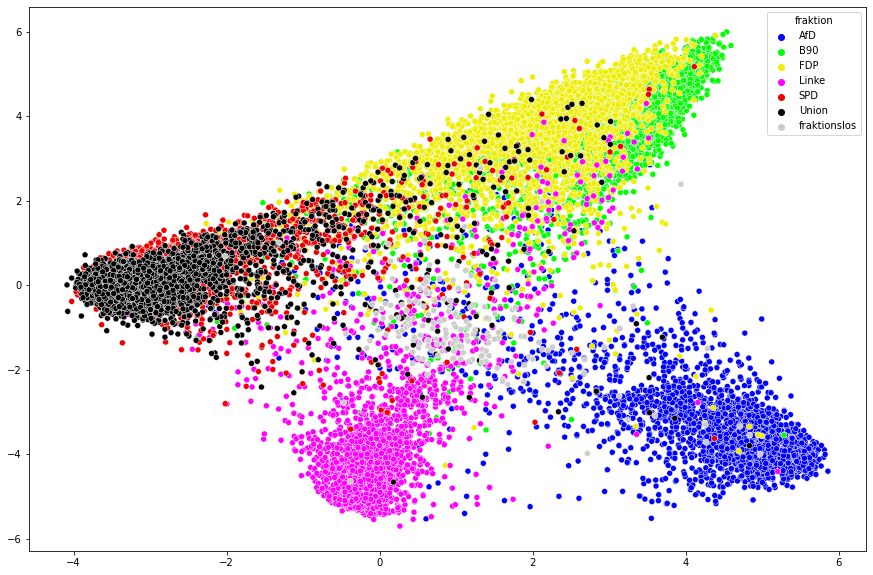

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
XX = pca.fit_transform(X)
fig = plt.figure(figsize=(15, 10))
palette = ["#0000FF", "#00FF00", "#EEEE00",  "#FF00FF", "#EE0000", "#000000", "#CCCCCC"]
sns.scatterplot(x=XX[:, 0], y=XX[:, 1], hue=labels, palette=palette)
plt.savefig("latent_space_all25_pca.png")

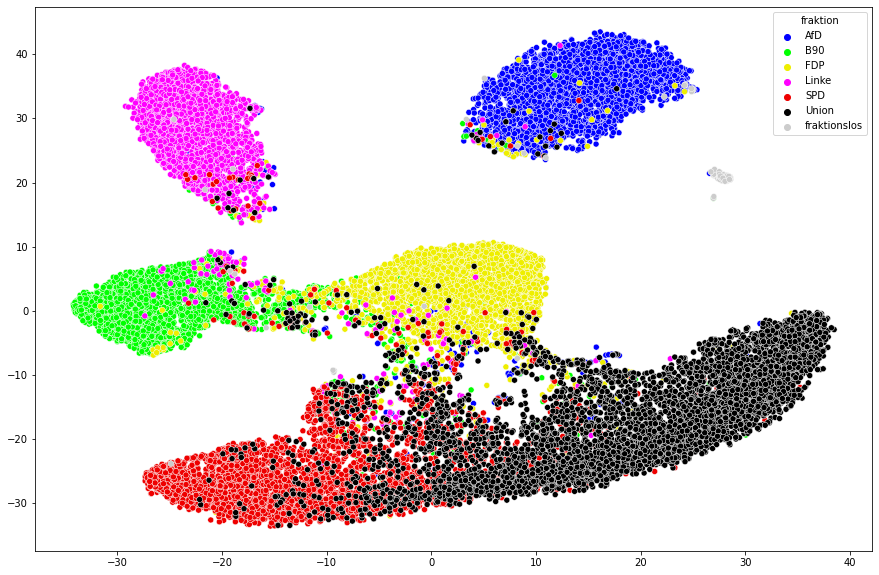

In [53]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=300)
XX = tsne.fit_transform(X)
fig = plt.figure(figsize=(15, 10))
palette = ["#0000FF", "#00FF00", "#EEEE00",  "#FF00FF", "#EE0000", "#000000", "#CCCCCC"]
sns.scatterplot(x=XX[:, 0], y=XX[:, 1], hue=labels, palette=palette)
plt.savefig("latent_space_all25_tsne300.png")

## Mean position of voters

In [ ]:
sonntagsfrage = {
    "AfD": 0.11,
    "B90": 0.18,
    "FDP": 0.12,
    "Linke": 0.07,
    "SPD": 0.18,
    "Union": 0.26,
    "fraktionslos": 0
}
weights = np.array([sonntagsfrage[l] for l in labels])
np.mean(XX * np.stack([weights, weights]).T, axis=0)